# 抓取博主主页
### 安装weibo_spider
```bash
python3 -m pip install weibo_spider
```
### 抓取博主主页内容
*注：weibo为输出目录，config.json为配置文件，可以设置抓取内容*
```bash
python3 -m weibo_spider --output_dir="data" --config_path="weiboSpider/config.json"
```
*配置文件示例*
```json
{
    "user_id_list": ["user id"],
    "filter": 1,
    "since_date": "2021-01-01",
    "end_date": "now",
    "random_wait_pages": [1, 5],
    "random_wait_seconds": [6, 10],
    "global_wait": [[1000, 3600], [500, 2000]],    
    "write_mode": ["csv","txt"],
    "pic_download": 0,
    "video_download": 0,
    "result_dir_name": 0,
    "cookie": "your cookie",
    "sqlite_config": "weibo.db"
}
```

# 读取抓取数据

In [17]:
import pandas as pd
df = pd.read_csv("data/少数派sspai/1914010467.csv")
article=df["微博正文"]
likes=df["点赞数"]

# 生成帖子词云

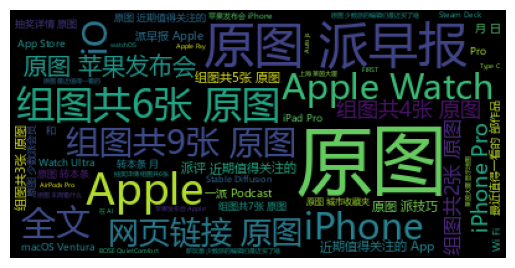

In [18]:
from wordcloud import WordCloud
import PIL .Image as image
text = " ".join(i for i in article)
wordcloud=WordCloud(font_path="data/msyh.ttc").generate(text)
word_image=wordcloud.to_image()
word_image.save('data/博主帖子词云.png','png')
# 显示图片
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

lena = mpimg.imread('data/博主帖子词云.png')
plt.imshow(lena)
plt.axis('off')
plt.show()

# 帖子热度统计

In [26]:
# 导入库
from matplotlib import font_manager
from datetime import datetime
likes=df.loc[:,"点赞数"]
comment=df.loc[:,"评论数"]
forward=df.loc[:,"转发数"]
s=df.loc[:,"发布时间"]
print()
l=[]
i=1
while i<len(s):
    l.append(datetime.strptime(str(s[i]),"%Y-%m-%d %H:%M"))
    i+=1
time=pd.DataFrame(l)
my_font = font_manager.FontProperties(fname=r"data/msyh.ttc")
plt.figure(figsize=(15,8),dpi=80)
plt.plot(range(len(likes)), likes, label='点赞数',color="r")
plt.plot(range(len(comment)), comment, label='评论数',color="b")
plt.plot(range(len(forward)), forward, label='转发数',color="y")
# 设置x，y坐标
plt.xticks(time)
plt.yticks(range(500))
# 设置网格线
plt.grid(alpha=0.2)
plt.legend(prop=my_font,loc="upper left")
plt.title('微博热度折线图',fontproperties=my_font)
plt.show()
plt.savefig('data/帖子热度统计.png')



ValueError: time data '发布时间' does not match format '%Y-%m-%d %H:%M'

# 爬取微博热搜

In [21]:
import requests
import json
from bs4 import BeautifulSoup
import schedule
import time
import csv
from xlutils.copy import copy
url = 'https://s.weibo.com/top/summary?Refer=top_hot&topnav=1&wvr=6'
with open('data/微博热搜.csv', 'a+', newline='') as f:
    f_csv = csv.writer(f)
    f_csv.writerow(['时间', '排名', '热度', '内容'])
def run():
    header = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.54 Safari/537.36',
        'Cookie': 'WEIBOCN_WM=3349; MLOGIN=0; loginScene=102003; SUB=_2A25OZUb0DeRhGeFM71cR8SjPyTyIHXVtpmq8rDV6PUJbkdANLUTtkW1NQNrR0hDYvbkyXXHvhSXTK6gLZwPIvqhj; _T_WM=2f61b9622f544de949daf22f40ebcc99'
    }
    cookie = {
        'Cookie': ''
    }
    response = requests.get(url, headers=header, cookies=cookie)
    response.encoding = 'utf-8'
    soup = BeautifulSoup(response.text, 'html.parser')
    items = soup.find_all('td', class_='td-02')
    time_stamp = time.strftime('%Y/%m/%d %H:%M', time.localtime(time.time()))  # 时间戳

    for i, item in enumerate(items[1:11]):
        result = []
        rank = '第{0}名'.format(i+1)     # 微博排名
        num = str(item.find('span')).replace('<span>', '').replace('</span>', '')  # 微博热度
        title = item.find('a').text  # 微博内容
        result.append(time_stamp)
        result.append(rank)
        result.append(num)
        result.append(title)
        with open('data/微博热搜.csv', 'a+',newline='') as f:
            f_csv = csv.writer(f)
            f_csv.writerow(result)
    print(time_stamp)
run()
schedule.every(30).seconds.do(run)
while True:
    schedule.run_pending()


2022/11/11 18:38
1
2022/11/11 18:38
2022/11/11 18:38
2022/11/11 18:39
1
2022/11/11 18:39
2022/11/11 18:39
2022/11/11 18:39
1
2022/11/11 18:39
2022/11/11 18:39


KeyboardInterrupt: 

# 动态热搜图

In [59]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Timeline,Grid
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
import pandas as pd
data=pd.read_csv('data/微博热搜.csv')
tl = Timeline({"theme": ThemeType.MACARONS})

# 指定热搜图持续的分钟数
for i in range(20):
    bar = (
        Bar({"theme": ThemeType.MACARONS})
        .add_xaxis(list(data['内容'])[i*10:i*10+10][::-1])
        .add_yaxis("微博热搜榜", list(data['热度'])[i*10:i*10+10][::-1])
        .reversal_axis()
        .set_global_opts(
            title_opts=opts.TitleOpts("{}".format(list(data['时间'])[i*10]),pos_right='0%',pos_bottom='15%'),
            xaxis_opts=opts.AxisOpts(
                splitline_opts=opts.SplitLineOpts(is_show=True),
                position='top',
                name_gap=10,
                boundary_gap=['20%', '20%']),
            yaxis_opts=opts.AxisOpts(splitline_opts=opts.SplitLineOpts(is_show=True),
                                     axislabel_opts=opts.LabelOpts(color='#FF7F50')),)
        .set_series_opts(label_opts=opts.LabelOpts(position="right",color='#9400D3'))
    )
    grid = (
        Grid()
        .add(bar, grid_opts=opts.GridOpts(pos_left="25%",pos_right="0%"))
    )
    tl.add(grid, "{}分".format(i))
    tl.add_schema(
        play_interval=1000,   #播放速度
        is_timeline_show=False,  #是否显示 timeline 组件
        is_auto_play=True,
    )
tl.render('data/微博热搜榜.html')

'/home/dky/Github/Mine/python-practice/day07/weibo/data/微博热搜榜.html'

# 生成热搜词云

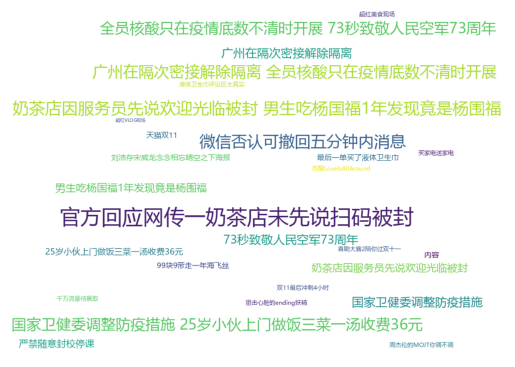

In [62]:
# 导入库
from wordcloud import WordCloud
import PIL .Image as image
import imageio


hots=data['内容']
text = " ".join(i for i in hots)
wordcloud=WordCloud(font_path="data/msyh.ttc",
                    width=1000,
                    height=700,
                    background_color='white').generate(text)
word_image=wordcloud.to_image()
word_image.save('data/热搜词云.png','png')
# 显示图片
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

lena = mpimg.imread('data/热搜词云.png')
plt.imshow(lena)
plt.axis('off')
plt.show()

# 按关键词搜索内容

In [32]:
import requests
import re 
import os
import urllib.parse
import time
import pandas as pd
#header文件     
headers ={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:76.0) Gecko/20100101 Firefox/76.0)',
    'Cookie': 'WEIBOCN_WM=3349; MLOGIN=0; loginScene=102003; SUB=_2A25OZUb0DeRhGeFM71cR8SjPyTyIHXVtpmq8rDV6PUJbkdANLUTtkW1NQNrR0hDYvbkyXXHvhSXTK6gLZwPIvqhj; _T_WM=2f61b9622f544de949daf22f40ebcc99'
}
#搜索名词
keyword = 'iphone'
#创建同名文件夹
filepath = str(r'data/'+keyword)
if not os.path.exists(filepath):
    os.mkdir(filepath)
#搜索名词下40页源码并保存为txt文件
kw=urllib.parse.quote(keyword)
s_url ='https://s.weibo.com/weibo?q='+kw+'&wvr=6&b=1&Refer=SWeibo_box'
f = requests.get(s_url,headers = headers)
# 获取搜索到的前40条数据
for i in range(40):
  html = requests.get(s_url+'&page='+str(i),headers = headers)
  html = html.text
  html =urllib.parse.unquote(html)
  with open(filepath+'/'+keyword+'.txt','a',encoding ="utf-8") as f:
     f.write(html)
  time.sleep(0.5)
#打开该文件  
with open(filepath+'/'+keyword+'.txt','r',encoding ="utf-8") as h:
     html = h.read()
#解析内容并下载          
uids = re.findall('<a href="//weibo.com/(.*?)?refer_flag=1001030103_" class=".*?" target=".*?" nick-name="(.*?)" suda-data=".*?">.*?</a>',html)
contents = re.findall(' <p class="txt" node-type="feed_list_content" nick-name=".*?">(.*?)</p>',html,re.S)
pic_id = re.findall('<!--card-wrap-->(.*?)<!--/card-wrap-->',html,re.S)
data=pd.DataFrame(columns = range(3))
data.columns=['用户名','用户id','帖子']
for i in range(len(uids)):
    uid,nickname = uids[i]
    data = pd.concat([data, pd.DataFrame.from_records([{ '用户id': uids[i][0],'用户名': uids[i][1], '帖子': re.sub('<.*?>','',contents[i],re.S)}])])
print(data)
data.to_csv("data/搜索结果.csv")


             用户名         用户id  \
0          财经网科技  5061229888?   
0           老板联播  5994003317?   
0        UNCLE疯叔  2322312760?   
0           空一格君  2174397023?   
0   吃饭睡觉认真工作2020  3164187354?   
..           ...          ...   
0       Chills牙牙  6560668913?   
0         o欧喔哦噢o  1635818482?   
0        找同款的李点点  3173696070?   
0    在慈宁宫烤面包的小鸭叽  7729882073?   
0      爱吃香菜_June  6962195102?   

                                                   帖子  
0   \n                    #国人买iPhone14Pro需工作22天#【全...  
0   \n                    【苹果称#iPhone14Pro收货需要等待更长...  
0   \n                    近几年真正能平衡到重量/尺寸/观感的iPhone...  
0   \n                    苹果今天就郑州富士康疫情发表声明，简单说就是工人...  
0   \n                    垃圾苹果，做个长截图功能很难吗&#xe627;i...  
..                                                ...  
0   \n                    这不，奇奇怪怪的壁纸又增加了&#xe627;iP...  
0   \n                    有没有好心人 给我再买两部iPhone14 不然...  
0   \n                    iphone合集。需要📱的来看看 ​      ...  
0   \n                    苹果生态真的好吊啊后悔现在才买🍎w

# 爬取评论区

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

def fetchurl(pid,uid,max_id):
    url = "https://weibo.com/ajax/statuses/buildComments"
    headers = {
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:76.0) Gecko/20100101 Firefox/76.0)',
        'Cookie': 'WEIBOCN_WM=3349; MLOGIN=0; loginScene=102003; SUB=_2A25OZUb0DeRhGeFM71cR8SjPyTyIHXVtpmq8rDV6PUJbkdANLUTtkW1NQNrR0hDYvbkyXXHvhSXTK6gLZwPIvqhj; _T_WM=2f61b9622f544de949daf22f40ebcc99'
    }
    params = {
        "flow": 0,
        "is_reload": 1,
        "id": pid,
        "is_show_bulletin": 2,
        "is_mix": 0,
        "max_id": max_id,
        "count": 20,
        "uid": uid,
    }
    r = requests.get(url,headers=headers,params=params)
    return r.json()
def parseJson(jsonObj):
    data = jsonObj["data"]
    max_id = jsonObj["max_id"]
    commentData=[]
    for item in data:
        # 评论id
        comment_Id = item["id"]
        # 评论内容
        content = BeautifulSoup(item["text"], "html.parser").text
        # 评论时间
        created_at = item["created_at"]
        # 点赞数
        like_counts = item["like_counts"]
        # 评论数
        total_number = item["total_number"]

        # 评论者 id，name，city
        user = item["user"]
        userID = user["id"]
        userName = user["screen_name"]
        userCity = user["location"]
        userGender= user["gender"]
        dataItem = [comment_Id, created_at, userID, userName, userGender,userCity, like_counts, total_number, content]
        commentData.append(dataItem)
    return commentData,max_id
def save_data(data, path, filename):

    if not os.path.exists(path):
        os.makedirs(path)

    dataframe = pd.DataFrame(data)
    dataframe.to_csv(path + filename, encoding='utf_8_sig', mode='a', index=False, sep=',', header=False )
if __name__ == "__main__":

    pid = 4717939545342043      # 微博id
    uid = 6512991534            # 用户id
    max_id = 0
    path = "./data/"           # 保存的路径
    filename = "微博评论.csv"   # 保存的文件名

    csvHeader = [["评论id", "发布时间", "用户id", "昵称","性别", "城市", "点赞数", "回复数", "评论内容"]]
    save_data(csvHeader, path, filename)

    while(True):
        html = fetchurl(pid, uid, max_id)
        comments, max_id = parseJson(html)
        save_data(comments, path, filename)
        # 爬取结束
        if max_id == 0:
            break;


KeyboardInterrupt: 

# 绘制评论区ip归属地地图

In [2]:
from pyecharts.charts import Geo
import pandas as pd
df = pd.read_csv('data/微博评论.csv')
# 建立geo坐标系
geo = Geo()
attr=list(df["城市"])
# value = list(df["城市"].value_counts())

# 基础数据
city=df["城市"].value_counts()
print(city.index.dtype)
data=[["广东"],["山东"],["河南"],["四川"],["江苏"],["河北"],["湖南"],["安徽"],["浙江"],["湖北"],["广西"],["云南"],["江西"],["辽宁"],["黑龙江"],["陕西"],["山西"],["福建"],["重庆"],["贵州"],["吉林"],["甘肃"],["内蒙古"],["上海"],["台湾"],["新疆"],["北京"],["天津"],["海南"],["香港"],["青海"],["宁夏"],["西藏"],["澳门"],["海外"]]
loc=[]
i=0
while i<len(data):
    j=0
    sum=0.0
    while j<len(city):
        # print(city.index[j].find(data[i][0]))
        if city.index[j].find(data[i][0]) !=-1:
            sum=sum+city[j]
        j+=1
    data[i].append(sum)
    i+=1
i=0
while i<len(data):
    data[i]=tuple(data[i])
    i+=1
# print(data)

# 绘制地图
from pyecharts.charts import Map,Geo
from pyecharts import options as opts
map=(
    Map()
    .add("",data,"china")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="评论区ip归属地地图",subtitle="数据来源：微博评论区IP归属地",pos_right="center",pos_top="5%"),
        visualmap_opts=opts.VisualMapOpts(max_=50),
    )  
)
map.render('data/评论区ip归属地地图.html')

object


'/home/dky/Github/Mine/python-practice/day07/weibo/data/评论区ip归属地地图.html'

# 用户表情使用统计

In [16]:
# 导入库
import re
import pandas as pd

# 过滤表情
def filter_str(desstr, restr=''):
    res = re.compile('[^\U00010000-\U0010ffff]',flags=re.UNICODE)
    return res.sub(restr, desstr)

data=pd.read_csv("data/微博评论.csv")
comments=data["评论内容"]
gender=data["性别"]
lists=[]
i=0
while i<len(comments):
    if filter_str(str(comments[i])):
        lists.append(filter_str(str(comments[i])))
    i+=1
lists=list(set(lists))
values=[]
i=0
while i<len(lists):
    j=0
    sum_male=0
    sum_female=0
    while j < len(comments):
        if filter_str(str(comments[j]))==lists[i]:
            if gender[j]=="f":
                sum_female+=1
            else:
                sum_male+=1
        j+=1
    values.append([lists[i],sum_male,sum_female,sum_female+sum_male])
    i+=1
data=pd.DataFrame(values)
data.columns=["表情","男","女","频率"]
data.to_csv("data/用户表情使用统计.csv")